Wskaźnik newsów - CD PROJEKT
============================

Notowanie
---------------

In [13]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('CDPROJEKT','20190520','20190525')    
                       

Analiza Twittów
----------------------

In [20]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp.KeyWords= { 'CDPROJEKT':{
                    'search': ['CD Projekt'],
                    'ignore':['sponsor'],
                    'sentiment':{
                        'kuluary':-1,
                        'spadek':-1,
                        
                        'wierzyć':1,
                        'E3 2019':1,
                        'dużo więcej':1,
                        'rozpoczął':1,
                        'dywidendy':1,
                        'rekord':1,
                        'maksimum':1,
                        'szczyt':1,
                        'najdroższy':1
                        }
                    }
               }

twt =  twp.indicator('CDPROJEKT','20190520','20190525')
twt_f = list(filter(lambda x: not x.ignore and x.power>1000 and x.sentiment!=0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)


430622 ['wierzyć'] 2019-05-22 19:00:52 WPROST 🇵🇱🇪🇺
-------------------------------------------------------------------------
Nie tylko gracze czekają na „Cyberpunk 2077”. Inwestorzy wierzą w CD Projekt https://t.co/oPcfoXaem8
-------------------------------------------------------------------------
Nie tylko Gracze czekać na „Cyberpunk 2077 ” . inwestor wierzyć W CD projekt https : //t.co/oPcfoXaem8 
56820 ['E3 2019'] 2019-05-21 00:49:31 Animatic811
-------------------------------------------------------------------------
RT @OneAngryGamerHD: Marcin Iwiński To Talk CD Projekt Red And Cyberpunk 2077 At E3 2019 | #Cyberpunk #Cyberpunk2077 #CP2077 #E3 #E32019 ht…
-------------------------------------------------------------------------
RT @ OneAngryGamerHD : Marcin iwiński to talk CD projekt reda Anda cyberpunk 2077 At E3 2019 | # cyberpunk # Cyberpunk2077 # CP2077 # E3 # E32019 ht… 
52309 ['E3 2019'] 2019-05-21 08:07:18 FightSJWCensorship
-------------------------------------------------

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

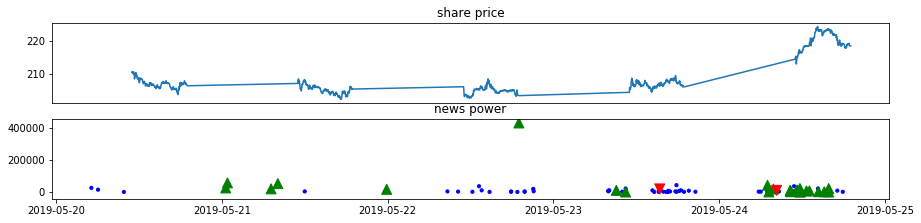

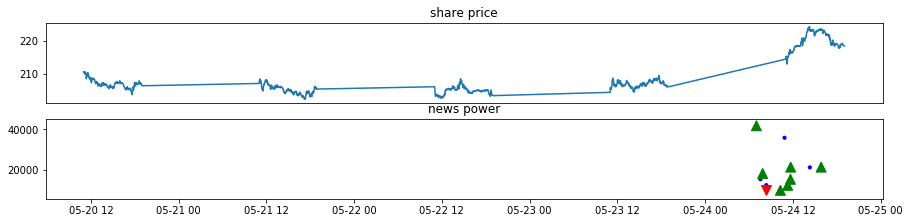

21531 ['maksimum'] 2019-05-24 15:52:00 PAP Biznes
-------------------------------------------------------------------------
DZIEŃ NA GPW: Wzrosty indeksów; CD Projekt na historycznych maksimach
https://t.co/uAm5ue6DAh
-------------------------------------------------------------------------
dzień na GPW : wzrost indeks ; CD projekt na historyczny maksimum https : //t.co/uAm5ue6DAh 
21381 [] 2019-05-24 14:19:03 Money.pl
-------------------------------------------------------------------------
Grube miliony na grę. CD Projekt zaskoczył rynek

https://t.co/pzHYhh6DZH
-------------------------------------------------------------------------
grube milion na gra . CD projekt zaskoczyć rynek https : //t.co/pzHYhh6DZH 
21531 ['szczyt'] 2019-05-24 11:42:00 PAP Biznes
-------------------------------------------------------------------------
DZIEŃ NA GPW: Główne indeksy zwyżkują; CD Projekt na historycznych szczytach
https://t.co/2a6bRSJKqk
--------------------------------------------------------

In [21]:
import plot_helper 
import datetime

twt_w = twt #list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w)

df = datetime.datetime.strptime('20190524',"%Y%m%d")
twt_w2 = list(filter(lambda x: x.date >df and  x.power>10000 ,twt))
plot_helper.plot2(data,twt_w2)

twt_w2.sort(key=lambda x: x.date, reverse=True)
for t in twt_w2:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)

